<a href="https://colab.research.google.com/github/jfcepeda97/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/blob/master/Stack_Im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import glob
from PIL import Image, ImageChops, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from osgeo import gdal

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
Aspect= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Aspect")
Channel_Network= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Channel Network Base Level")
Channel_Distance= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Channel Network Distance")
Distance_faults= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Distance to faults")
Distance_roads= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Distance to road")
Elevation= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Elevation")
Geology= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Geology")
LS_Factor= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/LS-Factor")
Plan_curvature= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Plan Curvature")
Profile_curvature= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Profile Curvature")
Relative_slope= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Relative Slope Position")
Slope= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Slope")
TWI= glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Topographic Wetness Index")
Vegetation=glob.glob("/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/DATASET_CORREGIDA/NO DESLIZAMIENTO/Vegetation")


In [11]:
basename= '*.tif'
outdir2= '/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0'
filelist2= glob.glob(os.path.join(outdir2,basename))
files_string= " ".join(filelist2)
print(files_string)

/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Aspect_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Channel Network Base Level_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Channel Network Distance_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Elevation_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/LS-Factor_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Plan Curvature_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Profile Curvature_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Relative Slope Position_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Slope_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/TWI_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Vegetation_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOF

In [43]:
gg= gdal.BuildVRT("", filelist2, separate= True)
g= gdal.Translate("Raster_0.tif",gg, format= "GTiff")

In [39]:
import os 
directorio_actual= os.getcwd()
print('El directorio actual es: ',directorio_actual)

El directorio actual es:  /content


In [40]:
os.makedirs('Resultados_No_Deslizamientos')

In [16]:
dataset = gdal.Open(r'/content/Raster_0.tif')
print(dataset.RasterCount)

14


In [28]:
dataset.GetProjection()

'PROJCS["WGS 84 / UTM zone 17S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32717"]]'

In [32]:
dataset.RasterXSize


5

In [31]:
dataset.RasterYSize

5

In [19]:
Aspect = dataset.GetRasterBand(1) 
Channel_Network= dataset.GetRasterBand(2) 
Channel_Distance = dataset.GetRasterBand(3) 
Distance_faults = dataset.GetRasterBand(4)
Distance_roads = dataset.GetRasterBand(5)
Geology = dataset.GetRasterBand(6) 
Elevation = dataset.GetRasterBand(7) 
LS_Factor = dataset.GetRasterBand(8) 
Plan_curvature = dataset.GetRasterBand(9) 
Profile_curvature = dataset.GetRasterBand(10) 
Relative_slope = dataset.GetRasterBand(11) 
Slope = dataset.GetRasterBand(12) 
TWI = dataset.GetRasterBand(13) 
Vegetation = dataset.GetRasterBand(14)

In [20]:
Aspecto = Aspect.ReadAsArray()
Channel_N = Channel_Network.ReadAsArray()
Channel_D = Channel_Distance.ReadAsArray()
Distance_F = Distance_faults.ReadAsArray()
Distance_R = Distance_roads.ReadAsArray()
Geology1 = Geology.ReadAsArray()
Elevation1 = Elevation.ReadAsArray()
LS_F = LS_Factor.ReadAsArray()
Plan_c = Plan_curvature.ReadAsArray()
Profile_c = Profile_curvature.ReadAsArray()
R_slope = Relative_slope.ReadAsArray()
Slope1 = Slope.ReadAsArray()
TWI1= TWI.ReadAsArray()
Vegetation1 = Vegetation.ReadAsArray()

TypeError: ignored

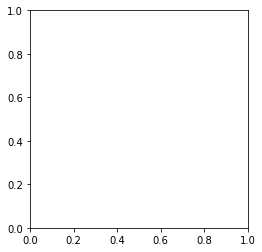

In [36]:
img = np.dstack((Aspecto, Channel_N, Channel_D, Distance_F, Distance_R, Geology1, Elevation1, LS_F, Plan_c, Profile_c, R_slope, Slope1, TWI1, Vegetation1)) 
f = plt.figure() 
plt.imshow(img) 
plt.savefig('Raster0.tif') 
plt.show()